In [1]:
import re
import os
import json
from Preprocess.Log2Graph import *

In [9]:
data_dir_0 = 'Data'
processed_dir_0 = 'ProcessedData'
data_dir_1 = '2021-09-29-RaspVM-experiment-64run-env1'

# Log2graph

In [10]:
os.mkdir(os.path.join(processed_dir_0, data_dir_1))

for data_dir_2 in os.listdir(os.path.join(data_dir_0, data_dir_1)):
    curr_dir = os.path.join(data_dir_1, data_dir_2)
    os.mkdir(os.path.join(processed_dir_0, curr_dir))

    # Find audit log file
    r_audit = re.compile(".*_audit.log")
    audit_logs = list(filter(r_audit.match, os.listdir(os.path.join(data_dir_0, curr_dir))))
    # print(len(audit_logs), audit_logs)
    if len(audit_logs) > 1:
        print(f"Multiple Audit Log Files! {os.path.join(data_dir_0, curr_dir)}")
        raise
    if len(audit_logs) == 0:
        print(f"Not Found Audit Log File! {os.path.join(data_dir_0, curr_dir)}")
        raise
    
    # print(os.path.join(data_dir_0, curr_dir, audit_logs[0]), os.path.join(processed_dir_0,curr_dir, os.path.splitext(audit_logs[0])[0]))
    data_dict = log2graph(
        input_path=os.path.join(data_dir_0, curr_dir, audit_logs[0]),
        interval=60,
        overlap=30,
        )

    if data_dict is None:
        print(f"Not Found Audit Record! {os.path.join(data_dir_0, curr_dir)}")
        continue
    
    output_path = os.path.join(processed_dir_0,curr_dir, os.path.splitext(audit_logs[0])[0])
    np.savez(
        f'{output_path}.npz',
        node_attr=data_dict['node_attr'],
        node_flag=data_dict['node_flag'],
        node_index=data_dict['node_index'],
        edge_flag=data_dict['edge_flag'],
        edge_attr=data_dict['edge_attr'],
        edge_index=data_dict['edge_index'],
        timestamp=data_dict['timestamp'],
        )


Not Found Audit Record! Data\2021-09-29-RaspVM-experiment-64run-env1\2021-09-29T011242


In [ ]:
raise

In [11]:
for data_dir_1 in os.listdir(data_dir_0):
    annotated_dict = {}
    for data_dir_2 in os.listdir(os.path.join(data_dir_0, data_dir_1)):
        curr_dir = os.path.join(data_dir_1, data_dir_2)
        # Find annotated file
        if "annotated.txt" not in os.listdir(os.path.join(data_dir_0, curr_dir)):
            print("Not Found Annotated File!")
            raise
        
        with open(os.path.join(data_dir_0, curr_dir, "annotated.txt")) as f:
            annotated_list = f.readlines()
        # print(os.path.join(data_dir_0, curr_dir, "annotated.txt"))

        for text in annotated_list:
            _type = re.search(r'"annotationName":\s"([^,]*)",', text).group(1)
            _timestamp = re.search(r'"annotationTime":\s([^,]*),', text).group(1)
            _date = re.search(r'"annotationDate":\s([^,]*)}', text).group(1)

            if _type in ["dos", "privesc"]:
                annotated_dict.update({data_dir_2:(_type,_timestamp)})
                # print(annotated_dict)
    with open(os.path.join(processed_dir_0,data_dir_1,'annotated.json'),"w") as f:
        json.dump(annotated_dict,f)

# Further Preprocess

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get Node Num Threshold
total_node_num = []
for data_dir_2 in os.listdir(os.path.join(processed_dir_0, data_dir_1)):
    if data_dir_2 == 'annotated.json':
        continue
    curr_dir = os.path.join(data_dir_1, data_dir_2)
    r_audit = re.compile(".*_audit.npz")
    audit_datafile = list(filter(r_audit.match, os.listdir(os.path.join(processed_dir_0, curr_dir))))
    if len(audit_datafile) == 0:
        continue
    # print(data_dir_2, audit_datafile)
    _dataset = np.load(os.path.join(processed_dir_0, curr_dir, audit_datafile[0]))

    edge_flag = _dataset['edge_flag']
    edge_index = _dataset['edge_index']
    edge_attr = _dataset['edge_attr']
    node_flag = _dataset['node_flag']
    node_index = _dataset['node_index']
    node_attr = _dataset['node_attr']
    ts_list = _dataset['timestamp']
    
    node_num_list = [len(_index) for _index in np.split(node_index, node_flag)]
    total_node_num += node_num_list
    # print(np.median(node_num_list), node_num_list)    
print(np.median(total_node_num))
print(np.mean(total_node_num))

21.0
27.577301161751564


In [ ]:
data_dir_2 = '2021-09-27T174658'
curr_dir = os.path.join(data_dir_1, data_dir_2)
r_audit = re.compile(".*_audit.npz")
audit_datafile = list(filter(r_audit.match, os.listdir(os.path.join(processed_dir_0, curr_dir))))
_dataset = np.load(os.path.join(processed_dir_0, curr_dir, audit_datafile[0]))

edge_flag = _dataset['edge_flag']
edge_index = _dataset['edge_index']
edge_attr = _dataset['edge_attr']
node_flag = _dataset['node_flag']
node_index = _dataset['node_index']
node_attr = _dataset['node_attr']
ts_list = _dataset['timestamp']

node_attr_split = np.split(node_attr[node_index],node_flag)
# node_attr_split[0]

# print(ts_list)
a = [len(_index) for _index in np.split(node_index, node_flag)]
print(np.median(a))
print(a)

18.0
[4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 8, 153, 18, 21, 19, 21, 18, 22, 18, 21, 18, 28, 18, 21, 19, 21, 18, 22, 18, 21, 18, 61, 26, 118, 19, 22, 18, 23, 18, 22, 18, 70, 0]


(array([ 63., 200.,  20.,   0., 680., 122., 107., 667.,  30.,  46.,  18.,
         12.,   8.,   6.,   7.,  10.,   9.,  39.,   8.,  17.,  13.,   6.,
         31.,  15.,   4.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,  10.,
          8.,   6.,   8.,   4.,   0.,   1.,   0.,   2.,   0.,   5.,   7.,
          3.,   2.,   5.,   1.,   5.,   5.,   4.,   8.,   2.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   3.39,   6.78,  10.17,  13.56,  16.95,  20.34,  23.73,
         27.12,  30.51,  33.9 ,  37.29,  40.68,  44.07,  47.46,  50.85,
         54.24,  57.63,  61.02,  64.41,  67.8 ,  71.19,  74.58,  77.97,
         81.36,  84.75,  88.14,  91.53,  94.92,  98.31, 101.7 , 105.09,
        108.48, 111.87, 115.26

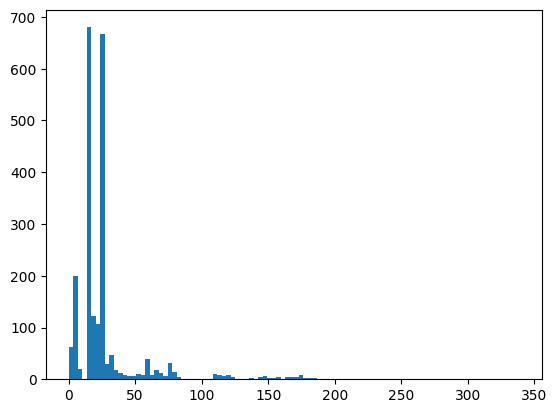

In [ ]:
plt.hist(total_node_num,bins=100)

In [ ]:
curr_dir = os.path.join(data_dir_1, data_dir_2)
r_audit = re.compile(".*_audit.log")
audit_datafile = list(filter(r_audit.match, os.listdir(os.path.join(data_dir_0, curr_dir))))
record_list = read_log(os.path.join(data_dir_0, curr_dir, audit_datafile[0]))


In [ ]:
print(os.path.join(data_dir_0, curr_dir, audit_datafile[0]))

Data/2021-09-27-RaspVM-experiment-64run-env1/2021-09-27T174658/2021-09-27T180222_audit.log
